###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [2]:
data1=pd.read_csv("college_1.csv")
data2=pd.read_csv("college_2.csv")
new_data=pd.concat([data1,data2],ignore_index=True)
new_data


,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
114,praveen raj j,24.0,0.0,2380,2380,Computer Science and Engineering,0,-1.0,0.0
115,AMARNATH D,-1.0,12.0,1890,1890,Electronics and Communication Engineering,0,52.0,-1.0
116,bala,32.0,0.0,1720,1720,Electronics and Communication Engineering,0,49.0,-1.0
117,XY Z,-1.0,-1.0,0,0,Computer Science and Engineering,0,20.0,-1.0


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [3]:
# spliting data
exceeded_expectation=new_data[new_data['CodeKata Score']>15000]
reached_expectation=new_data[new_data['CodeKata Score']<15000 & (new_data['CodeKata Score']>10000)]
needs_improvment=new_data[new_data['CodeKata Score']>7000 & (new_data['CodeKata Score']<10000)]
unsatisfactory=new_data[new_data['CodeKata Score']>7000] 

# setting indexs

exceeded_expectation.index=np.arange(1,len(exceeded_expectation)+1)
reached_expectation.index=np.arange(1,len(reached_expectation)+1)
needs_improvment.index=np.arange(1,len(needs_improvment)+1)
unsatisfactory.index=np.arange(1,len(unsatisfactory)+1)



In [4]:
#exporting splited data as csv 

exceeded_expectation.to_csv('exceeded_expectation.csv')
reached_expectation.to_csv('reached_expectation.csv')
needs_improvment.to_csv('needsimprovment.csv')
unsatisfactory.to_csv('unsatisfactory.csv')

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [5]:
geekions_average=new_data[['Previous Geekions']].mean()
codekata_average =new_data[['CodeKata Score']].mean()
print("average of previous week geekions \n",geekions_average)
print("average of this week geekions \n",codekata_average)

average of previous week geekions 
 Previous Geekions    3842.352941
dtype: float64
average of this week geekions 
 CodeKata Score    4051.764706
dtype: float64


###### No of students participated 

In [6]:
print("No. of Students participated \n ",new_data['Name'].count())

No. of Students participated 
  119


###### #Average completion of python course or my_sql or python english or computational thinking

In [7]:
python_completion=new_data[['python']].mean()
print(python_completion)
mysql_completion=new_data[['mysql']].mean()
print(mysql_completion)
englishpy_completion=new_data[['python_en']].mean()
print(englishpy_completion)
thinking_completion=new_data[['computational_thinking']].mean()
print(thinking_completion)

python    54.352941
dtype: float64
mysql    23.5
dtype: float64
python_en    29.657143
dtype: float64
computational_thinking    2.2
dtype: float64


###### rising star of the week (top 3 candidate who performed well in that particular week)

In [8]:
rising_star=new_data.nlargest(3,'Rising')
rising_star

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
92,shifak N,58.0,0.0,5180,8320,Electronics and Electrical Engineering,3140,0.0,0.0
86,Ganesh Ramkumar R,-1.0,24.0,8790,10790,Computer Science and Engineering,2000,55.0,6.0
102,Narasimhan Y L,-1.0,0.0,4800,6800,Computer Science and Engineering,2000,-1.0,0.0


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [9]:
shining_star=new_data.nlargest(3,'Previous Geekions')
shining_star

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN


###### Department wise codekata performence (pie chart)

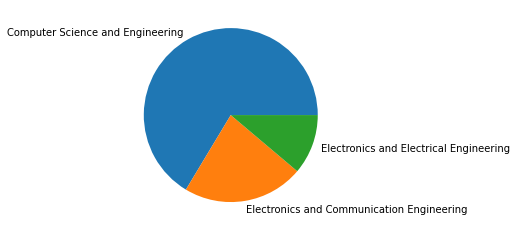

In [10]:
department=new_data.groupby('Department').sum()
score=department['CodeKata Score']
plt.pie(score,labels=department.index)
plt.show()


###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [11]:
comp_sci_engg=new_data[(new_data['Department']=='Computer Science and Engineering')]
electric_engg=new_data[(new_data['Department']=='Electronics and Electrical Engineering')]
communication_engg=new_data[(new_data['Department']=='Electronics and Communication Engineering')]

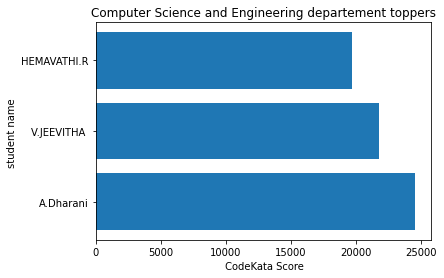

In [12]:
#visualisation 'Computer Science and Engineering' departement topper
cs_topper=comp_sci_engg.nlargest(3,'CodeKata Score')
score_1=cs_topper['CodeKata Score']
name=cs_topper['Name']
plt.barh(name,score_1)
plt.title('Computer Science and Engineering departement toppers')
plt.xlabel(' CodeKata Score')
plt.ylabel('student name ')
plt.show()

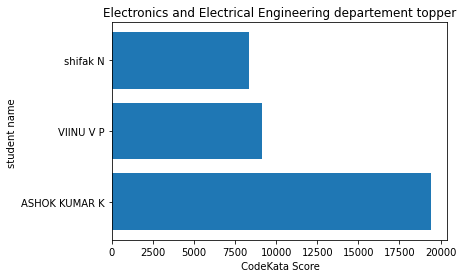

In [13]:
#visualisation 'Electronics and Electrical Engineering' departement topper
electronic_topper=electric_engg.nlargest(3,'CodeKata Score')
score_1=electronic_topper['CodeKata Score']
name=electronic_topper['Name']
plt.barh(name,score_1)
plt.title('Electronics and Electrical Engineering departement topper')
plt.xlabel(' CodeKata Score')
plt.ylabel('student name ')
plt.show()

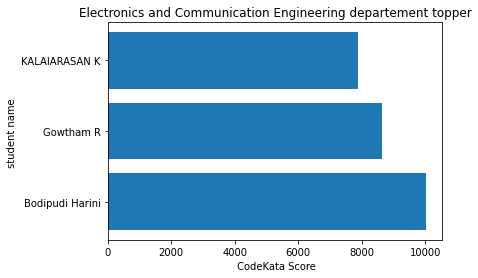

In [14]:
#visualisation 'Electronics and Communication Engineering' departement topper
communication_topper=communication_engg.nlargest(3,'CodeKata Score')
score_1=communication_topper['CodeKata Score']
name=communication_topper['Name']
plt.barh(name,score_1)
plt.title('Electronics and Communication Engineering departement topper')
plt.xlabel(' CodeKata Score')
plt.ylabel('student name ')
plt.show()